In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(1460, 81)

In [29]:
df.head(40)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000
11,12,60,RL,85.0,11924,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2006,New,Partial,345000
13,14,20,RL,91.0,10652,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,New,Partial,279500
20,21,60,RL,101.0,14215,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,11,2006,New,Partial,325300


In [5]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.drop(['MiscFeature', 'Fence', 'PoolQC', 'Alley'], axis = 1, inplace = True) 

In [23]:
pd.isnull(df).sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 77, dtype: int64

In [24]:
df.shape

(1460, 77)

In [25]:
df.dropna(inplace = True)

In [27]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,...,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,725.248714,55.351630,75.958834,11549.427101,6.818182,5.511149,1978.120069,1989.219554,155.593482,526.857633,...,117.178388,58.161235,19.291595,3.543739,24.806175,5.643225,23.927959,6.483705,2007.723842,222759.428816
std,422.353423,36.939463,27.214024,10602.911784,1.296789,1.001440,29.811827,19.579247,229.145284,542.348158,...,131.310023,71.153274,61.941837,28.890320,70.771219,55.659800,197.356695,2.792231,1.322901,92364.180462
min,2.000000,20.000000,21.000000,1300.000000,3.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,62383.000000
25%,359.000000,20.000000,60.000000,8425.000000,6.000000,5.000000,1959.000000,1976.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,159975.000000
50%,703.000000,60.000000,75.000000,10261.000000,7.000000,5.000000,1990.000000,1997.000000,16.000000,442.000000,...,100.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,193500.000000
75%,1098.000000,60.000000,86.000000,12436.500000,8.000000,6.000000,2005.000000,2005.000000,256.000000,872.500000,...,192.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,266250.000000
max,1458.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,407.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


In [28]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [33]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000
11,12,60,RL,85.0,11924,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2006,New,Partial,345000
13,14,20,RL,91.0,10652,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,New,Partial,279500
20,21,60,RL,101.0,14215,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,11,2006,New,Partial,325300


# YrSold

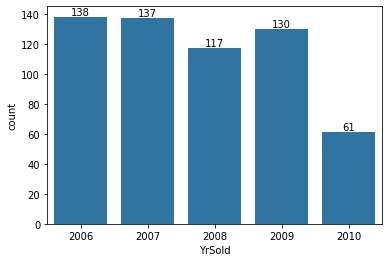

In [31]:
ax = sns.countplot(x = 'YrSold', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='YrSold', ylabel='SalePrice'>

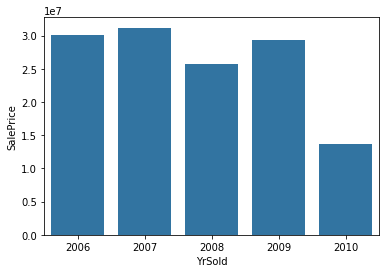

In [32]:
sales_yr = df.groupby(['YrSold'], as_index = False)['SalePrice'].sum().sort_values(by = 'SalePrice', ascending = False)
sns.barplot(x = 'YrSold', y = 'SalePrice', data = sales_yr)

From the above graph we can see that number of sales of houses in 2006 is the highest and in 2007 the total amount spend in buying the houses is maximum.

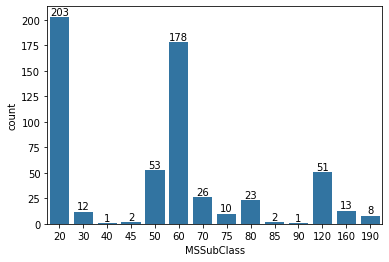

In [34]:
# Info of the houses
ax = sns.countplot(x = 'MSSubClass', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

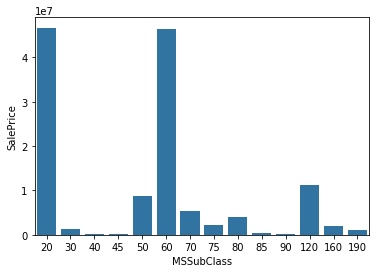

In [35]:
sales_yr = df.groupby(['MSSubClass'], as_index = False)['SalePrice'].sum().sort_values(by = 'SalePrice', ascending = False)
sns.barplot(x = 'MSSubClass', y = 'SalePrice', data = sales_yr)

From the above graph the we can see that the sales of 1-STORY 1946 & NEWER ALL STYLES is highest.  

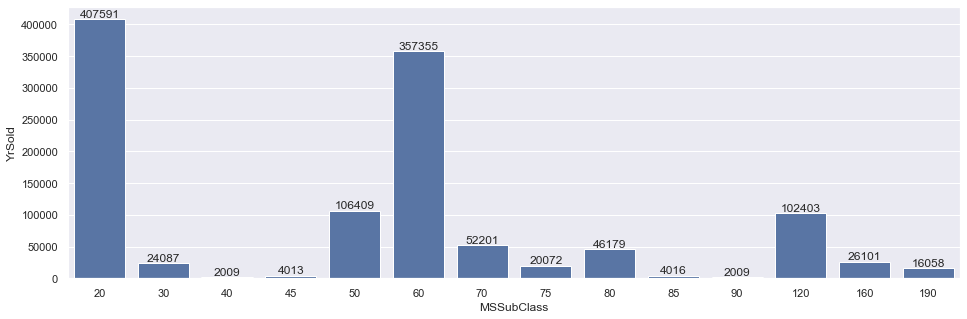

In [38]:
sales_yr = df.groupby(['MSSubClass'], as_index = False)['YrSold'].sum().sort_values(by = 'YrSold', ascending = False)
ax= sns.barplot(x = 'MSSubClass', y = 'YrSold', data = sales_yr)
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

# RoofType

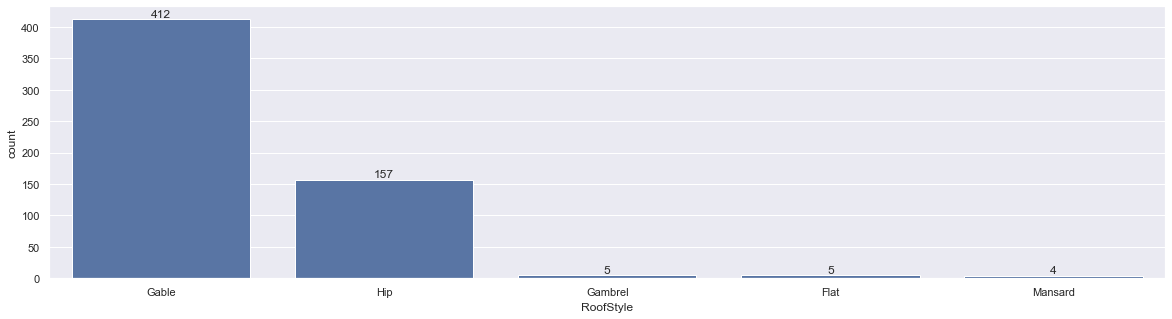

In [39]:
ax = sns.countplot(x = 'RoofStyle', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

From the above graph we can see that gabel and hip style roof are quite famous.

# Location

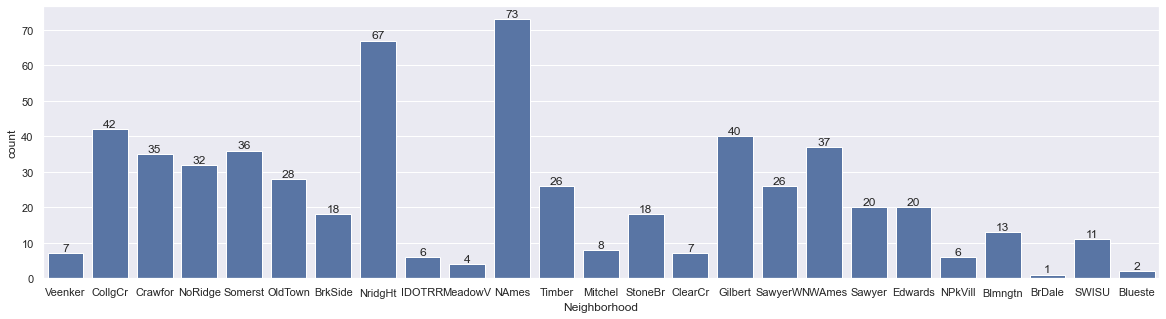

In [42]:
ax = sns.countplot(x = 'Neighborhood', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

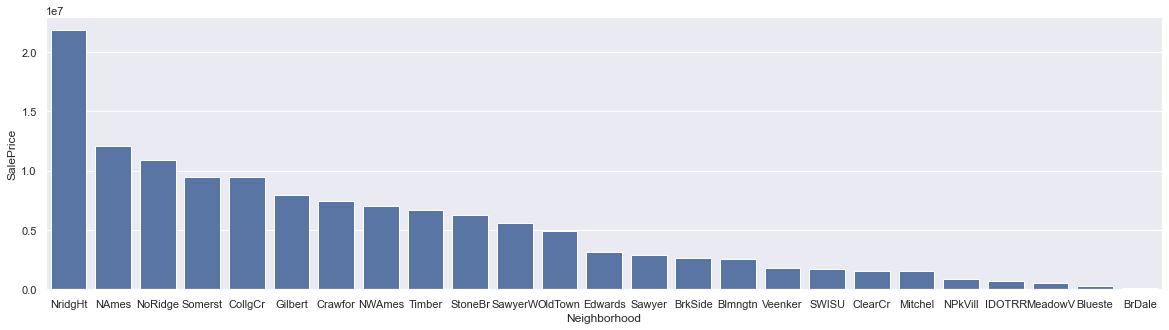

In [45]:
sales_yr = df.groupby(['Neighborhood'], as_index = False)['SalePrice'].sum().sort_values(by = 'SalePrice', ascending = False)
sns.barplot(x = 'Neighborhood', y = 'SalePrice', data = sales_yr)

From the above graph we can see that in Northridge Heights the no. of sales of houses is the highest.